In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import pandas.testing as tm
import matplotlib as plt
from matplotlib import pyplot as plt


# Time series - pre processing phase 
### With use of dataset 1: aantallen_gemeente_cumulatief 

The first phase is the pre processing phase where the input data is extracted from the larger dataset. This is done by selecting columns. Since daily data comes from different sources and places, the data is aggregated to a total cumulative sum. 

In [52]:
dutch_data_01 = pd.read_csv('/Users/stevenkraamwinkel/Desktop/Datasets 1 mei/COVID-19_aantallen_gemeente_cumulatief_01_05.csv', parse_dates=True, delimiter=';')
display(dutch_data_01)


,Date_of_report,Municipality_code,Municipality_name,Province,Total_reported,Hospital_admission,Deceased
0,13/03/2020 10:00,GM0003,Appingedam,Groningen,0,0,0
1,13/03/2020 10:00,GM0010,Delfzijl,Groningen,0,0,0
2,13/03/2020 10:00,GM0014,Groningen,Groningen,3,0,0
3,13/03/2020 10:00,GM0024,Loppersum,Groningen,0,0,0
4,13/03/2020 10:00,GM0034,Almere,Flevoland,1,1,0
...,...,...,...,...,...,...,...
151955,01/05/2021 10:00,NaN,NaN,Noord-Holland,668,20,2
151956,01/05/2021 10:00,NaN,NaN,Zuid-Holland,2312,46,15
151957,01/05/2021 10:00,NaN,NaN,Zeeland,56,4,1
151958,01/05/2021 10:00,NaN,NaN,Noord-Brabant,1144,29,7


In [53]:
#Selecting columns
dutch_data_01 = dutch_data_01[['Date_of_report', 'Total_reported', 'Hospital_admission', 'Deceased']]
dutch_data_01['Date_of_report']= pd.to_datetime(dutch_data_01['Date_of_report'], format='%d/%m/%Y %H:%M')
dutch_data_01 = dutch_data_01.set_index('Date_of_report')
display(dutch_data_01)
dutch_data_01.dtypes

,Total_reported,Hospital_admission,Deceased
Date_of_report,,,
2020-03-13 10:00:00,0,0,0
2020-03-13 10:00:00,0,0,0
2020-03-13 10:00:00,3,0,0
2020-03-13 10:00:00,0,0,0
2020-03-13 10:00:00,1,1,0
...,...,...,...
2021-05-01 10:00:00,668,20,2
2021-05-01 10:00:00,2312,46,15
2021-05-01 10:00:00,56,4,1


Total_reported        int64
Hospital_admission    int64
Deceased              int64
dtype: object

In [54]:
dutch_data_01.loc[dutch_data_01.index!='Date_of_report'].sum()
dutch_data_01 = dutch_data_01.resample('D').sum()
display(dutch_data_01)


,Total_reported,Hospital_admission,Deceased
Date_of_report,,,
2020-03-13,804,115,9
2020-03-14,959,136,12
2020-03-15,1135,162,19
2020-03-16,1413,205,23
2020-03-17,1705,314,40
...,...,...,...
2021-04-27,1472674,28445,17093
2021-04-28,1481323,28517,17104
2021-04-29,1488594,28580,17124


In the next part, three different time series are transformed from the cumulative sum to their original values. The daily infections, hospitalization and victims of COVID-19 will be visualised in the cells below. Also a weekly moving average, what is different for each day since for each day seven different days are averaged, is computed and visualised.  

### Extraction and moving averages of time series 1

In [55]:
#Cumulative function found from source: 
#https://codereview.stackexchange.com/questions/117183/extracting-original-values-from-cumulative-sum-values

cumulative = dutch_data_01['Total_reported']

def B(cumulative):
    output = [0] * len(cumulative)
    for i,e in reversed(list(enumerate(cumulative))):
        output[i]=cumulative[i] - cumulative[i-1]
    output[0]=cumulative[0]
    return output

#Shows the daily values for the daily cumulative values
print(B(cumulative))


[804, 155, 176, 278, 292, 346, 409, 1191, -20, 573, 545, 811, 852, 1019, 1172, 1159, 1104, 884, 845, 1019, 1083, 1026, 904, 1224, 952, 777, 969, 1213, 1335, 1316, 1174, 964, 868, 734, 1061, 1235, 1140, 1066, 750, 729, 708, 887, 806, 655, 655, 400, 171, 386, 514, 475, 445, 335, 199, 317, 232, 455, 319, 289, 245, 161, 196, 227, 270, 200, 189, 125, 146, 108, 198, 253, 188, 176, 172, 209, 133, 190, 182, 176, 131, 185, 103, 102, 86, 209, 210, 183, 239, 165, 164, 184, 164, 210, 179, 143, 165, 139, 117, 115, 107, 76, 91, 65, 64, 82, 110, 91, 69, 73, 76, 50, 62, 77, 75, 61, 73, 36, 37, 52, 52, 42, 81, 101, 71, 53, 106, 99, 103, 127, 144, 185, 163, 168, 163, 191, 137, 214, 205, 223, 247, 342, 338, 431, 366, 372, 485, 426, 601, 519, 486, 577, 630, 779, 654, 577, 636, 655, 507, 482, 489, 552, 529, 535, 508, 457, 574, 415, 571, 510, 507, 501, 508, 527, 462, 734, 601, 744, 654, 925, 797, 964, 1140, 823, 1270, 1231, 1087, 1300, 1379, 1542, 1753, 1974, 1887, 1844, 2217, 2245, 2357, 2544, 2777, 2713, 

In [56]:
#time series from total reported COVID-19 infections
time_series_01 = pd.Series(B(cumulative), 
                          index=pd.date_range('13/03/2020', periods =415))

#Selecting april 2020 - april 2021
time_series_01 = time_series_01['2020-04-01':'2021-04-30']
display(time_series_01)


2020-04-01    1019
2020-04-02    1083
2020-04-03    1026
2020-04-04     904
2020-04-05    1224
              ... 
2021-04-26    6200
2021-04-27    5337
2021-04-28    8649
2021-04-29    7271
2021-04-30    7758
Freq: D, Length: 395, dtype: int64

In [57]:
#Moving average code:
data_01 = pd.DataFrame(B(cumulative), index = pd.date_range('03/13/2020', '05/01/2021'), columns = {'Number_of_cases'})
data_01_weekly_average = data_01.resample('W').mean()

moving_average_01 = data_01['Number_of_cases'].rolling(7).mean()
moving_average_01['2020-04-01':'2021-04-30']



2020-04-01    1028.857143
2020-04-02    1038.000000
2020-04-03    1017.142857
2020-04-04     980.714286
2020-04-05     997.857143
                 ...     
2021-04-26    8055.285714
2021-04-27    7843.142857
2021-04-28    7868.571429
2021-04-29    7534.285714
2021-04-30    7326.857143
Freq: D, Name: Number_of_cases, Length: 395, dtype: float64

Text(0.5, 1.0, 'COVID-19 weekly moving average')

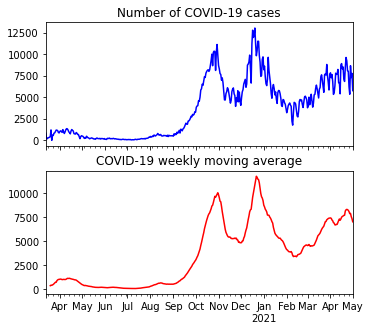

In [58]:
fig, axarr = plt.subplots(2, sharex=True)
fig.set_size_inches(5.5, 5,5)

data_01['Number_of_cases'].plot(ax=axarr[0], color='b')
axarr[0].set_title('Number of COVID-19 cases')

moving_average_01.plot(ax=axarr[1], color='r')
axarr[1].set_title('COVID-19 weekly moving average')

### Extraction and moving averages of time series 2

In [59]:
cumulative = dutch_data_01['Hospital_admission']

def B(cumulative):
    output = [0] * len(cumulative)
    for i,e in reversed(list(enumerate(cumulative))):
        output[i]=cumulative[i] - cumulative[i-1]
    output[0]=cumulative[0]
    return output

#Shows the daily values for the daily cumulative values
print(B(cumulative))

[115, 21, 26, 43, 109, 94, 81, 159, 188, 152, 242, 265, 341, 315, 349, 454, 529, 507, 722, 447, 625, 501, 336, 253, 260, 292, 308, 237, 225, 190, 196, 147, 210, 188, 182, 156, 129, 110, 75, 118, 124, 137, 123, 100, 75, 65, 88, 76, 84, 85, 93, 41, 36, 79, 20, 33, 71, 58, 22, 36, 35, 52, 27, 35, 45, 15, 27, 34, 14, 13, 9, 10, 13, 8, 10, 7, 16, 9, 5, 8, 9, 6, 9, 12, 11, 3, 4, 5, 6, 5, 3, 5, 9, 6, 3, 3, 2, -1, 11, 0, 3, 2, 2, 6, 4, 5, 0, 3, 3, 3, 1, 0, 4, 1, 1, 0, 2, 3, -2, 1, 3, 2, 1, -2, 5, 1, -4, 1, 3, 2, 2, 0, 3, -1, 2, 2, 5, 6, 3, 5, 7, 3, 6, 6, 10, 5, 1, 4, 2, 7, 6, 10, 9, 6, 11, 7, 6, 5, 4, 18, 10, 18, 11, 8, 4, 15, 19, 7, 9, 2, 3, 11, 5, 6, 5, 7, 5, 5, 9, 6, 8, 17, 10, 6, 17, 8, 24, 15, 14, 12, 33, 20, 26, 32, 32, 25, 36, 29, 37, 38, 46, 48, 47, 22, 30, 24, 59, 80, 63, 50, 66, 49, 53, 58, 111, 74, 74, 85, 80, 69, 84, 93, 101, 110, 112, 92, 109, 77, 109, 91, 80, 106, 117, 109, 89, 103, 100, 98, 89, 121, 94, 54, 74, 72, 92, 87, 92, 96, 86, 79, 104, 93, 64, 82, 67, 50, 81, 74, 64, 77,

In [60]:
time_series_02 = pd.Series(B(cumulative), 
                          index=pd.date_range('13/03/2020', periods =415))
time_series_02

2020-03-13    115
2020-03-14     21
2020-03-15     26
2020-03-16     43
2020-03-17    109
             ... 
2021-04-27     78
2021-04-28     72
2021-04-29     63
2021-04-30     78
2021-05-01    102
Freq: D, Length: 415, dtype: int64

In [61]:
#Selecting april 2020 - april 2021
time_series_02 = time_series_02['2020-04-01':'2021-04-30']
display(time_series_02)

2020-04-01    447
2020-04-02    625
2020-04-03    501
2020-04-04    336
2020-04-05    253
             ... 
2021-04-26     68
2021-04-27     78
2021-04-28     72
2021-04-29     63
2021-04-30     78
Freq: D, Length: 395, dtype: int64

In [62]:
data_02 = pd.DataFrame(B(cumulative), index = pd.date_range('03/13/2020', '05/01/2021'), columns = {'Hospital_admission'})
data_02_weekly_average = data_02.resample('W').mean()

moving_average_02 = data_02['Hospital_admission'].rolling(7).mean()
moving_average_02['2020-04-01':'2021-04-30']


2020-04-01    474.714286
2020-04-02    519.000000
2020-04-03    540.714286
2020-04-04    523.857143
2020-04-05    484.428571
                 ...    
2021-04-26     74.714286
2021-04-27     77.571429
2021-04-28     76.714286
2021-04-29     73.857143
2021-04-30     71.000000
Freq: D, Name: Hospital_admission, Length: 395, dtype: float64

Text(0.5, 1.0, 'COVID-19 hospital admissions moving average')

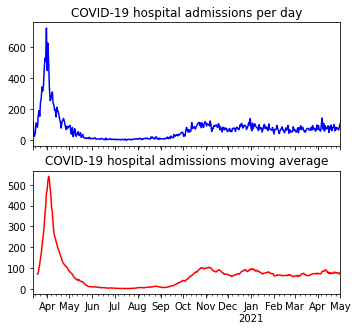

In [63]:
fig, axarr = plt.subplots(2, sharex=True)
fig.set_size_inches(5.5, 5,5)

data_02['Hospital_admission'].plot(ax=axarr[0], color='b')
axarr[0].set_title('COVID-19 hospital admissions per day')

moving_average_02.plot(ax=axarr[1], color='r')
axarr[1].set_title('COVID-19 hospital admissions moving average')

### Extraction and moving averages time series 3

In [64]:
cumulative = dutch_data_01['Deceased']

def B(cumulative):
    output = [0] * len(cumulative)
    for i,e in reversed(list(enumerate(cumulative))):
        output[i]=cumulative[i] - cumulative[i-1]
    output[0]=cumulative[0]
    return output

#Shows the daily values for the daily cumulative values
print(B(cumulative))

[9, 3, 7, 4, 17, 16, 21, 28, 31, 44, 33, 63, 80, 78, 112, 93, 132, 93, 175, 134, 166, 148, 164, 117, 99, 234, 147, 148, 115, 132, 94, 86, 122, 189, 181, 144, 142, 83, 67, 165, 138, 123, 112, 120, 66, 43, 48, 145, 84, 98, 94, 69, 26, 86, 36, 84, 71, 63, 18, 16, 54, 52, 28, 53, 27, 10, 14, 21, 33, 27, 13, 23, 11, 8, 26, 15, 32, 28, 20, 5, 6, 5, 10, 13, 15, 6, 2, 3, 15, 11, 2, 9, 4, 2, 6, 5, 4, 4, 3, 8, 1, 0, 5, 2, 3, 3, 2, 0, 2, 6, 2, 3, 2, 6, 1, 1, 4, 3, 2, -1, 1, 0, 0, -2, 1, 1, 1, -2, 0, 0, 0, 3, 0, 0, 1, 0, 1, 4, 2, 0, 0, 1, 1, 0, 1, 3, 0, 1, 3, 0, 0, 2, 2, 4, 2, 2, 3, 0, 3, 6, 10, 4, 5, 0, 2, 5, 8, 3, 2, 4, 0, 0, 6, 5, 0, 2, 4, 2, 0, 1, 2, 3, 3, 1, 1, 2, 2, 2, 6, 7, 2, 4, 2, 10, 5, 16, 16, 38, 8, 6, 13, 13, 13, 9, 21, 5, 7, 21, 36, 13, 13, 23, 17, 12, 35, 32, 29, 16, 29, 14, 17, 46, 59, 46, 45, 55, 27, 26, 70, 60, 56, 87, 50, 39, 29, 113, 106, 87, 118, 73, 44, 39, 98, 74, 89, 54, 85, 43, 44, 86, 82, 73, 51, 48, 21, 54, 90, 74, 75, 83, 59, 23, 27, 62, 66, 61, 58, 39, 25, 17, 71, 66, 

In [65]:
time_series_03 = pd.Series(B(cumulative), 
                          index=pd.date_range('13/03/2020', periods =415))
time_series_03

2020-03-13     9
2020-03-14     3
2020-03-15     7
2020-03-16     4
2020-03-17    17
              ..
2021-04-27    31
2021-04-28    11
2021-04-29    20
2021-04-30    24
2021-05-01    21
Freq: D, Length: 415, dtype: int64

In [66]:
#Selecting april 2020 - feb 2021
time_series_03 = time_series_03['2020-04-01':'2021-04-30']
display(time_series_03)


2020-04-01    134
2020-04-02    166
2020-04-03    148
2020-04-04    164
2020-04-05    117
             ... 
2021-04-26     13
2021-04-27     31
2021-04-28     11
2021-04-29     20
2021-04-30     24
Freq: D, Length: 395, dtype: int64

In [67]:
data_03 = pd.DataFrame(B(cumulative), index = pd.date_range('03/13/2020', '05/01/2021'), columns = {'Deceased'})
data_03_weekly_average = data_03.resample('W').mean()

moving_average_03 = data_03['Deceased'].rolling(7).mean()
moving_average_03['2020-04-01':'2021-04-30']


2020-04-01    116.714286
2020-04-02    129.285714
2020-04-03    134.428571
2020-04-04    144.571429
2020-04-05    142.428571
                 ...    
2021-04-26     17.714286
2021-04-27     18.285714
2021-04-28     17.285714
2021-04-29     17.428571
2021-04-30     18.857143
Freq: D, Name: Deceased, Length: 395, dtype: float64

Text(0.5, 1.0, 'COVID-19 deaths moving average')

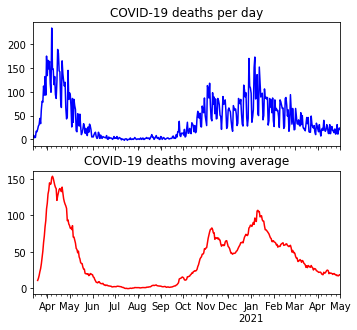

In [68]:
fig, axarr = plt.subplots(2, sharex=True)
fig.set_size_inches(5.5, 5,5)

data_03['Deceased'].plot(ax=axarr[0], color='b')
axarr[0].set_title('COVID-19 deaths per day')

moving_average_03.plot(ax=axarr[1], color='r')
axarr[1].set_title('COVID-19 deaths moving average')

# Modelling phase

After the data have been sufficiently preprocessed and visualised, the data and its underlying pattern can be understood. From the visualization it is clear that the three variables show somewhat identical patterns. There is not a very clear trend in the data, and there is no seasonality, which means that no patterns repeatedly occur every month or every three months. There are a few upward trends followed quickly by a trend downward, but these upwards trend are relatively unpredictable. 

For the final forecasting, the variable that contains the number of infected per day will be used as input data. The output will be the forecasted number of infected people over a three month time interval. 

# Simple Average (SA) model - baseline model

The simple average model, serves in this research as the baseline model. The model makes a simple computation, where every future value is the average value from the training data. 

In [69]:
SA_data = time_series_01.to_frame('Number_of_cases')
display(SA_data)


,Number_of_cases
2020-04-01,1019
2020-04-02,1083
2020-04-03,1026
2020-04-04,904
2020-04-05,1224
...,...
2021-04-26,6200
2021-04-27,5337
2021-04-28,8649
2021-04-29,7271


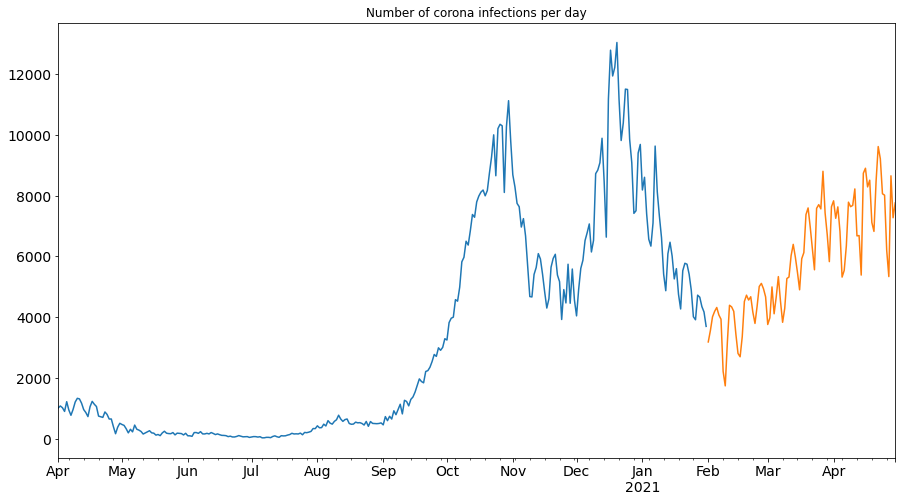

In [70]:
# Code of simple average model modified from source: 
# https://www.analyticsvidhya.com/blog/2018/02/time-series-forecasting-methods/?#

#Creating train and test set
#Index 305 = jan 31th 2020
#Index lenght = 395

#Train set: april 2020 - jan 2021, 82,3% of all data
train = SA_data[0:306]

#Test set: feb 2021 - april 2021, 17,7% of all data
test = SA_data[306:]

#Plotting data
train.Number_of_cases.plot(figsize=(15,8), title= 'Number of corona infections per day', fontsize=14)
test.Number_of_cases.plot(figsize=(15,8), title= 'Number of corona infections per day', fontsize=14)
plt.show()


In [71]:
# Simple average model statistics
SA_data.describe()

,Number_of_cases
count,395.000000
mean,3756.346835
std,3376.537146
min,36.000000
25%,456.000000
50%,3834.000000
75%,6384.500000
max,13032.000000


In [72]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

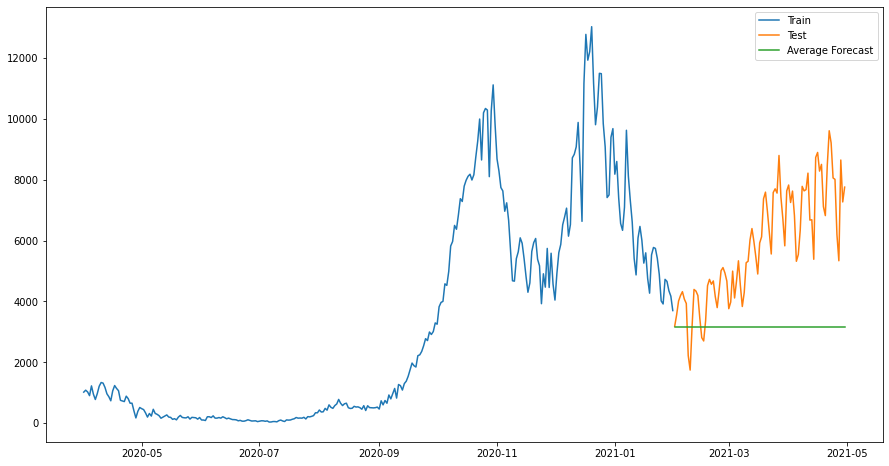

In [73]:
#Constructing the model that predicts the average value of the number of COVID-19 cases

y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Number_of_cases'].mean()
plt.figure(figsize=(15,8))
plt.plot(train['Number_of_cases'], label='Train')
plt.plot(test['Number_of_cases'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [74]:
rmse = sqrt(mean_squared_error(test.Number_of_cases, y_hat_avg.avg_forecast))
print(rmse)


3222.913457012739


In [75]:
mae = mean_absolute_error(test.Number_of_cases, y_hat_avg.avg_forecast)
print(mae)


2733.1559814937214


# Moving Average (MA) model

In [76]:
from statsmodels.tsa.arima.model import ARIMA

In [77]:
MA_data = time_series_01.to_frame('Number_of_cases')
display(MA_data)


,Number_of_cases
2020-04-01,1019
2020-04-02,1083
2020-04-03,1026
2020-04-04,904
2020-04-05,1224
...,...
2021-04-26,6200
2021-04-27,5337
2021-04-28,8649
2021-04-29,7271


In [78]:
#The following MA model is a modified version from source: 
#https://www.dezyre.com/recipes/forecast-moving-averages-for-time-series

train = MA_data[0:306] #Train set: april 2020 - jan 2020, 77,5% of all data
test = MA_data[306:] #Test set: feb 2021 - april 2021, 22,5% of all data

model = ARIMA(train.Number_of_cases, order=(0, 0, 1)).fit()

predictions = model.predict(start=len(train), end=len(train) + len(test)-1)
print(predictions)


2021-02-01    3366.569159
2021-02-02    3155.119129
2021-02-03    3155.119129
2021-02-04    3155.119129
2021-02-05    3155.119129
                 ...     
2021-04-26    3155.119129
2021-04-27    3155.119129
2021-04-28    3155.119129
2021-04-29    3155.119129
2021-04-30    3155.119129
Freq: D, Name: predicted_mean, Length: 89, dtype: float64


In [79]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:        Number_of_cases   No. Observations:                  306
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -2752.972
Date:                Wed, 07 Jul 2021   AIC                           5511.944
Time:                        16:26:08   BIC                           5523.115
Sample:                    04-01-2020   HQIC                          5516.411
                         - 01-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3155.1191    319.207      9.884      0.000    2529.484    3780.754
ma.L1          0.9024      0.020     44.168      0.000       0.862       0.942
sigma2      3.796e+06   4.37e+05      8.682      0.0

In [80]:
rmse = sqrt(mean_squared_error(test.Number_of_cases, predictions))
print(rmse)

3224.083635319909


In [81]:
mae = mean_absolute_error(test.Number_of_cases, predictions)
print(mae)

2736.022908715955


# Autoregressive (AR) model

In [82]:
AR_data = time_series_01.to_frame('Number_of_cases')
display(AR_data)


,Number_of_cases
2020-04-01,1019
2020-04-02,1083
2020-04-03,1026
2020-04-04,904
2020-04-05,1224
...,...
2021-04-26,6200
2021-04-27,5337
2021-04-28,8649
2021-04-29,7271


In [83]:
#The following AR model is a modified version from source: 
#https://www.dezyre.com/recipes/forecast-moving-averages-for-time-series

train = MA_data[0:306] #Train set: april 2020 - jan 2020, 77,5% of all data
test = MA_data[306:] #Test set: feb 2021 - april 2021, 22,5% of all data

model = ARIMA(train.Number_of_cases, order=(5, 0, 0)).fit()

predictions = model.predict(start=len(train), end=len(train) + len(test)-1)
print(predictions)


2021-02-01    3762.931305
2021-02-02    3885.514741
2021-02-03    3891.498188
2021-02-04    3861.291403
2021-02-05    3841.525999
                 ...     
2021-04-26    3458.904335
2021-04-27    3455.800041
2021-04-28    3452.727611
2021-04-29    3449.686718
2021-04-30    3446.677038
Freq: D, Name: predicted_mean, Length: 89, dtype: float64


In [84]:
print(model.summary())


                               SARIMAX Results                                
Dep. Variable:        Number_of_cases   No. Observations:                  306
Model:                 ARIMA(5, 0, 0)   Log Likelihood               -2394.028
Date:                Wed, 07 Jul 2021   AIC                           4802.057
Time:                        16:26:31   BIC                           4828.122
Sample:                    04-01-2020   HQIC                          4812.481
                         - 01-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3156.4704   4231.046      0.746      0.456   -5136.228    1.14e+04
ar.L1          0.9694      0.036     27.258      0.000       0.900       1.039
ar.L2         -0.2220      0.050     -4.466      0.0

In [85]:
rmse = sqrt(mean_squared_error(test.Number_of_cases, predictions))
print(rmse)

2913.896547215733


In [86]:
mae = mean_absolute_error(test.Number_of_cases, predictions)
print(mae)

2369.612047062154


# Simple Exponential Smoothing (SES) Model 

In [87]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt


In [88]:
SES_data = time_series_01.to_frame('Number_of_cases')
display(SES_data)

#Train set: april 2020 - jan 2020, 77.5% of all data
train = SES_data[0:306]

#Test set: feb 2021 - april 2021, 22.5% of all data
test = SES_data[306:]


,Number_of_cases
2020-04-01,1019
2020-04-02,1083
2020-04-03,1026
2020-04-04,904
2020-04-05,1224
...,...
2021-04-26,6200
2021-04-27,5337
2021-04-28,8649
2021-04-29,7271


<AxesSubplot:title={'center':'Corana infections per day'}>

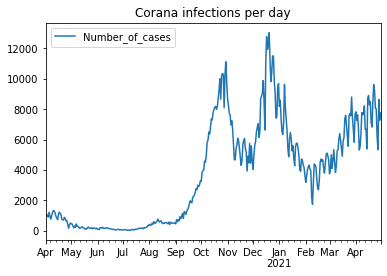

In [89]:
#SES run-sequence plot

SES_data[['Number_of_cases']].plot(title='Corana infections per day')

/Users/stevenkraamwinkel/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


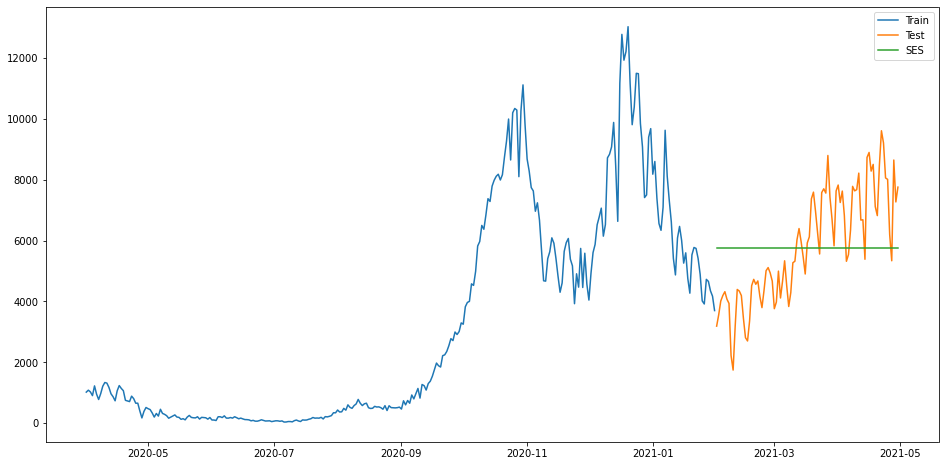

In [90]:
# Code of simple exponential smoothing model modified from source: 
# https://www.analyticsvidhya.com/blog/2018/02/time-series-forecasting-methods/?#

y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['Number_of_cases'])).fit(smoothing_level=0.06,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train['Number_of_cases'], label='Train')
plt.plot(test['Number_of_cases'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()


In [91]:
fit2.summary()

Dep. Variable:,endog,No. Observations:,306
Model:,SimpleExpSmoothing,SSE,714090625.357
Optimized:,False,AIC,4490.858
Trend:,None,BIC,4498.305
Seasonal:,None,AICC,4490.991
Seasonal Periods:,None,Date:,"Wed, 07 Jul 2021"
Box-Cox:,False,Time:,16:26:44
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0600000,alpha,False
initial_level,1019.0000,l.0,False


In [92]:
rmse = sqrt(mean_squared_error(test.Number_of_cases, y_hat_avg.SES))
print(rmse)

1817.1115789499693


In [93]:
mae = mean_absolute_error(test.Number_of_cases, y_hat_avg.SES)
print(mae)

1567.400286901896


### SES smoothing plot

/Users/stevenkraamwinkel/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


<AxesSubplot:title={'center':'Holt Winters Single Exponential Smoothing'}>

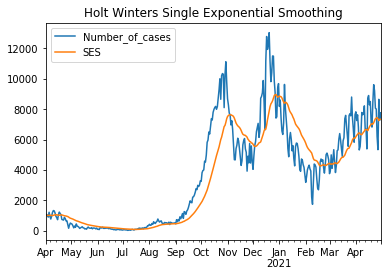

In [94]:
SES_data['SES'] = SimpleExpSmoothing(SES_data['Number_of_cases']).fit(smoothing_level=0.06, 
                                                                     optimized=False,use_brute=
                                                                     True).fittedvalues

SES_data[['Number_of_cases', 'SES']].plot(title='Holt Winters Single Exponential Smoothing')


# Holt Winter's Exponential Smoothing (HWES)

In [95]:
HWES_data = time_series_01.to_frame('Number_of_cases')

#Train set: april 2020 - dec 2020, 82,3% of all data
train = HWES_data[0:306]

#Test set: jan 2021 - feb 2021, 17,7% of all data
test = HWES_data[306:]


/Users/stevenkraamwinkel/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/Users/stevenkraamwinkel/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


Text(0.5, 1.0, 'Holt-Winters, Triple ES model')

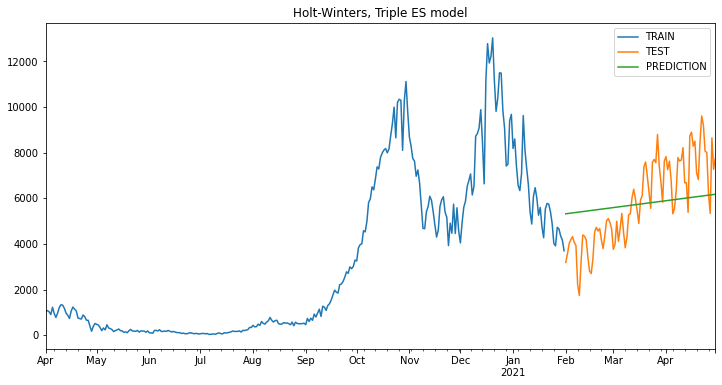

In [97]:
#The code is a modified version from source: 
#https://medium.com/analytics-vidhya/python-code-on-holt-winters-forecasting-3843808a9873

HWES_model = ExponentialSmoothing(train['Number_of_cases'], trend='add', seasonal_periods=12).fit(smoothing_level=0.0955)


test_predictions = HWES_model.forecast(len(test))

train['Number_of_cases'].plot(legend=True, label='TRAIN')
test['Number_of_cases'].plot(legend=True, label='TEST',figsize=(12,6))
test_predictions.plot(legend=True, label='PREDICTION')

plt.title('Holt-Winters, Triple ES model')


In [98]:
HWES_model.summary()

Dep. Variable:,Number_of_cases,No. Observations:,306
Model:,ExponentialSmoothing,SSE,505652858.058
Optimized:,True,AIC,4389.239
Trend:,Additive,BIC,4404.134
Seasonal:,None,AICC,4389.520
Seasonal Periods:,None,Date:,"Wed, 07 Jul 2021"
Box-Cox:,False,Time:,16:27:12
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0955000,alpha,False
smoothing_trend,0.0060031,beta,True


In [99]:
rmse = sqrt(mean_squared_error(test.Number_of_cases, test_predictions))
print(rmse)

1611.336289818808


In [100]:
mae = mean_absolute_error(test.Number_of_cases, test_predictions)
print(mae)

1379.3418363599708


END OF NOTEBOOK, VERSION: 19TH OF JUNE, 2021. TIME SERIES MODELLING 1
